<b>Greta Tengattini</b>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<div style="font-size: 1.5em; font-weight: bold;">A2: Modeling Case Study</div>
<div style="font-size: 1.2em;">DAT-5329 | Introduction to Machine Learning & AI</div>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

# Model Introduction

In this project, the objective was to create a model that predicts whether a newborn will fall into the category of negative birthweight— indicating a weight below the healthy threshold of 2500 grams as defined by the World Health Organization (WHO)— or positive birthweight, signifying a weight within or above the standard healthy range. This threshold of 2500 grams, approximately 5.5 pounds, is the internationally recognized benchmark for low birthweight (LBW), derived from medical consensus and empirical evidence. LBW is a critical concern, as it is associated with a host of short- and long-term health challenges.

I utilized Logistic Regression as my primary modeling approach due to the fact that it offers unparalleled advantages for predicting the binary outcome of baby health, specifically birthweight classifications. 

To measure how well my model did, I used the confusion matrix. This helped me understand not just when my model got predictions right, but also when and how it got them wrong.


# Package and Dataset Imports

In [1]:
## Importing Libraries ##

import numpy as np  # For numerical operations and working with arrays, essential for scientific computing.
import pandas as pd  # Provides data structures and functions for effective data manipulation and analysis.
import matplotlib.pyplot as plt  # For creating a wide range of static, animated, and interactive visualizations in Python.
import seaborn as sns  # Complements matplotlib with additional plot types, simplified syntax for complex charts, and attractive default styles.
import sklearn.metrics as metrics  # Importing the metrics module from sklearn to access various performance evaluation functions in a consolidated manner.

# sklearn libraries for data preprocessing and model building
from sklearn.impute import SimpleImputer  # For handling missing data by imputing/replacing missing values using various strategies.
from sklearn.preprocessing import StandardScaler  # For scaling features to a standard range, important for models like SVM and k-NN.
from sklearn.ensemble import RandomForestClassifier  # A robust ensemble machine learning classifier that uses multiple decision trees.
from sklearn.model_selection import train_test_split  # For dividing the dataset into training and testing sets to evaluate model performance.
from sklearn.metrics import confusion_matrix  # To evaluate classification accuracy by comparing predicted vs actual labels.
from sklearn.tree import DecisionTreeClassifier # A predictive modeling algorithm that builds regression or classification models in the form of a tree structure.
from sklearn.linear_model import LogisticRegression  # LogisticRegression is used for modeling binary outcomes, making it ideal for predicting categories based on input features.
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score  # These functions from sklearn.metrics are essential for evaluating the performance of the classifier.


In [2]:
# Load the training data from a CSV file
file_train = './birthweight.csv'  # Path to the CSV file containing the training data
df_train_raw = pd.read_csv(file_train)  # Read the data into a pandas DataFrame for analysis and modeling

In [3]:
# Load the test dataset from a CSV file
file_test = './kaggle_test_data.csv'  # Define the path to the CSV file containing the test data
df_test_raw = pd.read_csv(file_test)  # Read the test data into a separate pandas DataFrame

In [4]:
# Preserve the continuous birthweight data before any transformations
continuous_bwght = df_train_raw['bwght'].copy()  # Make a copy of the original continuous birthweight column for later analysis

**Is there an official threshold that signifies when birthweight gets more dangerous? In other words, is there a cutoff point between a healthy birthweight and a non-healthy birthweight? Provide credible sources as necessary. (minimum 5 sentences)**

The World Health Organization (WHO) defines LBW as a birthweight of less than 2500 grams (approximately 5.5 pounds) regardless of gestational age. The use of 2500 grams (approximately 5.5 pounds) as a threshold for defining low birthweight (LBW) is based on both medical consensus and empirical evidence. Here's why this threshold is commonly used:

Mortality Risk: Infants born with a birthweight below 2500 grams are at significantly higher risk of mortality compared to those with higher birthweights. Therefore, this threshold helps healthcare professionals identify newborns who may require additional medical attention and support to improve their chances of survival.

Health Outcomes: Research indicates that LBW infants are more likely to experience a range of short- and long-term health complications, including respiratory distress syndrome, infections, developmental delays, and chronic diseases later in life. By using 2500 grams as a cutoff point, healthcare providers can identify infants at increased risk of these adverse outcomes.

Data Consistency: Using a standardized threshold like 2500 grams allows for consistent reporting and comparison of LBW rates across different populations, regions, and time periods. This consistency is essential for monitoring trends in LBW prevalence, evaluating interventions, and informing public health policies aimed at improving maternal and child health.

Clinical Practice: Healthcare providers rely on established thresholds like 2500 grams to guide clinical decision-making regarding the management and care of newborns. This threshold helps prioritize resources and interventions for infants most at risk due to their low birthweight.

Furthermore, it's crucial to note that extremely low birthweight (ELBW), often classified as less than 1000 grams (2.2 pounds), presents even more substantial risks. This classification, acknowledged by The World Health Organization, underscores the heightened vulnerability of infants born at such low birthweights.

In [5]:
# Convert birthweight into a binary classification problem (low birthweight as 1, otherwise 0)
df_train_raw['bwght_cat'] = (df_train_raw['bwght'] < 2500).astype(int)
y_data = df_train_raw['bwght_cat']

# Remove the prediction variable from the full data
df_train_raw.drop(['bwght'], axis=1, inplace=True)

df_train_raw['set'] = 'Not Kaggle'            # Adds a new column 'set' to the training dataset and fills it with 'Not Kaggle'.
                                              # This marks all rows originating from the training set for easy identification later.

df_test_raw['set'] = 'Kaggle'                     # Similarly, adds a 'set' column to the testing dataset, but marks these rows as 'Kaggle'.
                                              # This differentiates rows originating from the test set.

df_full = pd.concat(objs=[df_train_raw, df_test_raw], # List of DataFrames to concatenate. Here, combining training and test sets.
                    axis=0,                   # Axis to concatenate along. '0' means row-wise concatenation,
                                              # effectively stacking one DataFrame on top of the other.
                    ignore_index=False)       # If False, the original row indices from each DataFrame are preserved. 

In [6]:
# Display the first few rows of the test dataset to inspect its structure and initial data points
df_test_raw.head()

,bwt_id,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,set
0,bwt_14,30,16.0,5,10.0,38,16.0,9,9,0.0,0.0,1,1,0,0,1,0,0,Kaggle
1,bwt_16,29,12.0,1,9.0,28,12.0,9,10,0.0,0.0,0,1,0,0,1,0,0,Kaggle
2,bwt_24,28,16.0,1,12.0,30,16.0,8,9,0.0,0.0,1,1,0,0,1,0,0,Kaggle
3,bwt_30,30,12.0,1,12.0,28,12.0,9,9,0.0,0.0,0,1,0,0,1,0,0,Kaggle
4,bwt_57,37,17.0,3,12.0,36,16.0,9,9,0.0,0.0,0,1,0,0,1,0,0,Kaggle


In [7]:
# Removing features not available at prediction time
df_full.drop(['omaps', 'fmaps'], axis=1, inplace=True)  # Drop 'omaps' and 'fmaps' columns from the DataFrame

In [8]:
# Checking Data
df_full.head(n=5)  # Displays the first 5 rows of the concatenated DataFrame.
                   # This is a quick check to ensure the concatenation worked as expected and to preview the combined data.

,bwt_id,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght_cat,set
0,bwt_1,28,12.0,2,10.0,31.0,17.0,0.0,0.0,0,1,0,0,1,0,0,0.0,Not Kaggle
1,bwt_2,21,NaN,1,6.0,21.0,NaN,NaN,NaN,0,1,0,0,1,0,0,1.0,Not Kaggle
2,bwt_3,27,15.0,2,11.0,32.0,16.0,0.0,0.0,1,1,0,0,1,0,0,0.0,Not Kaggle
3,bwt_4,33,17.0,1,20.0,39.0,17.0,0.0,0.0,0,0,0,1,0,0,1,0.0,Not Kaggle
4,bwt_5,30,15.0,2,12.0,36.0,16.0,NaN,NaN,1,1,0,0,1,0,0,0.0,Not Kaggle


# Exploratory Data Analysis and Data Preprocessing

In [9]:
# Displaying the size of the train dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {df_train_raw.shape[0]} 

Features (columns) : {df_train_raw.shape[1]}
""")


Size of Original Dataset
------------------------
Observations (rows): 409 

Features (columns) : 20



In [10]:
# Displaying the size of the test dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {df_test_raw.shape[0]} 

Features (columns) : {df_test_raw.shape[1]} 
""")


Size of Original Dataset
------------------------
Observations (rows): 64 

Features (columns) : 19 



In [11]:
# Generate descriptive statistics for numerical columns in the training dataset
# The 'describe' method provides a summary that includes mean, standard deviation, min/max, and quartiles
# Rounding to 2 decimal places for easier interpretation
df_train_raw.describe(include='number').round(decimals=2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght_cat
count,409.00,404.00,409.00,391.00,408.00,401.00,407.00,407.00,381.00,382.00,409.00,409.00,409.00,409.00,409.00,409.00,409.00,409.0
mean,29.85,13.66,2.22,11.57,32.24,13.90,8.20,8.95,1.19,0.02,0.49,0.87,0.07,0.05,0.88,0.07,0.05,0.2
std,5.13,2.16,1.33,3.89,6.14,2.24,1.41,0.58,4.27,0.32,0.50,0.33,0.26,0.23,0.33,0.26,0.22,0.4
min,16.00,3.00,0.00,0.00,18.00,6.00,1.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,27.00,12.00,1.00,10.00,28.00,12.00,8.00,9.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.0
50%,30.00,13.00,2.00,12.00,32.00,14.00,9.00,9.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.0
75%,33.00,16.00,3.00,13.00,36.00,16.00,9.00,9.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.0
max,44.00,17.00,8.00,36.00,62.00,17.00,10.00,10.00,30.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


In [12]:
# Identifying and Imputing Missing Values in Numerical Columns
# First, identify all numerical columns in the dataset. This is crucial as imputation strategies might differ
# between numerical and categorical data.
numeric_columns = df_full.select_dtypes(include=['number']).columns

# Initialize the SimpleImputer class from sklearn, setting 'mean' as the strategy.
# This means that missing values in each column will be replaced with the mean value of that column.
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the numerical columns of the DataFrame.
# This step involves calculating the mean of each column (fit) and replacing missing values with these means (transform).
df_full[numeric_columns] = imputer.fit_transform(df_full[numeric_columns])

In [13]:
# Verify the Absence of Missing Values
# After imputing missing values in the numerical columns
# to ensure there are no remaining NaN values. This check is performed across all columns (axis=0).
print(df_full.isnull().sum(axis=0)) 

bwt_id       0
mage         0
meduc        0
monpre       0
npvis        0
fage         0
feduc        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght_cat    0
set          0
dtype: int64


In [14]:
# Analyzing Correlations with Continuous Birthweight

# To include the continuous birthweight in my correlation analysis, I add it back to the full DataFrame.
# This step reintroduces the original, unscaled birthweight data, facilitating a more interpretable analysis.
df_full['continuous_bwght'] = continuous_bwght

# For the correlation analysis, I focus on numerical data. This step filters out non-numeric columns,
# ensuring our correlation matrix only includes relevant data.
numeric_cols = df_full.select_dtypes(include=['number']).columns

# I use Pearson's correlation coefficient to measure the linear relationship between variables.
# The correlation coefficient ranges from -1 to 1, where 1 means a perfect positive linear relationship,
# -1 means a perfect negative linear relationship, and 0 means no linear relationship.
data_corr_numeric = df_full[numeric_cols].corr(method='pearson')

# To specifically understand how various factors relate to birthweight, I filter the correlation matrix
# to show only the correlations with continuous birthweight. This highlights potential predictors
# of birthweight within the dataset.
correlations_with_continuous_bwght = data_corr_numeric.loc[:, 'continuous_bwght'].round(decimals=2).sort_values(ascending=False)

# Finally, I print these correlations to identify which features have the strongest relationships
# with continuous birthweight, guiding future analysis and model feature selection.
print(correlations_with_continuous_bwght)

continuous_bwght    1.00
npvis               0.16
fage                0.14
mage                0.07
male                0.06
monpre              0.05
feduc               0.05
mwhte               0.03
fblck               0.03
meduc               0.01
mblck               0.01
fwhte               0.01
drink              -0.02
cigs               -0.03
foth               -0.05
moth               -0.06
bwght_cat          -0.72
Name: continuous_bwght, dtype: float64


**Are there any strong positive or strong negative linear (Pearson) correlations with birthweight? Answer this question based on the original, continuous form of birthweight. (minimum 5 sentences)** 

In my analysis, I've intentionally excluded variables such as 'omaps' and 'fmaps' from consideration, as they represent data from a past event horizon, which I've deemed out-of-scope for the current investigation due to their nature of being post-outcome measurements.Focusing on the other available features, it's evident that none exhibit a strong negative linear relationship with birthweight. Specifically, all the correlation coefficients are under the moderate correlation threshold of 0.3 in absolute value, indicating only weak associations. This leads to the conclusion that, within the scope of the variables I'm examining, there are no strong predictors that have an inverse correlation with birthweight.

In [15]:
# Identifying and Developing a Correlation Matrix for Numeric Columns

# First, isolate the numerical columns from the full DataFrame. This step ensures that the correlation analysis
# is conducted only on numerical data, as correlation calculations require numeric values.
numeric_cols = df_full.select_dtypes(include=['number']).columns

# Next, calculate the correlation matrix for these numerical columns using Pearson's correlation coefficient.
# Pearson's method assesses the linear relationship between each pair of variables, providing a value between -1 and 1.
# Values close to 1 or -1 indicate a strong linear relationship, while values near 0 suggest no linear relationship.
data_corr_numeric = df_full[numeric_cols].corr(method='pearson')

# Focus the analysis on understanding how each numerical feature correlates with 'bwght_cat', the binary categorization
# of birthweight. By filtering the correlation matrix to show only the correlations with 'bwght_cat' and rounding the
# results to two decimal places. Sorting the results in descending order.
rentals_corr_numeric = data_corr_numeric.loc[:, 'bwght_cat'].round(decimals=2).sort_values(ascending=False)

# Print the sorted correlation values. This step is essential for identifying potential predictors of birthweight
# categorization based on their correlation strength, informing future analysis and model feature selection.
rentals_corr_numeric


bwght_cat           1.00
cigs                0.05
mwhte               0.05
meduc               0.03
fwhte               0.03
foth               -0.00
drink              -0.01
feduc              -0.02
moth               -0.03
mage               -0.04
fblck              -0.04
male               -0.04
mblck              -0.04
monpre             -0.06
fage               -0.09
npvis              -0.12
continuous_bwght   -0.72
Name: bwght_cat, dtype: float64

**After transforming birthweight (bwght) using this threshold, did correlations and/or phi coefficients improve? Why or why not?**

After converting the birth weight data into a binary format, the coefficients experienced a decline. Previously, the highest coefficient was 0.16 for the number of prenatal visits; however, post-transformation, it has reduced to 0.12. 
Additionally, the phi coefficients have not shown any improvement. This outcome may stem from the limitations inherent in the dataset. The data available may not adhere to industry norms, or it might reveal the challenge of predicting low birth weight using the current variables. Moreover, adjusting the threshold specifically for this dataset could enhance correlations if the birth weight is modified in this way.

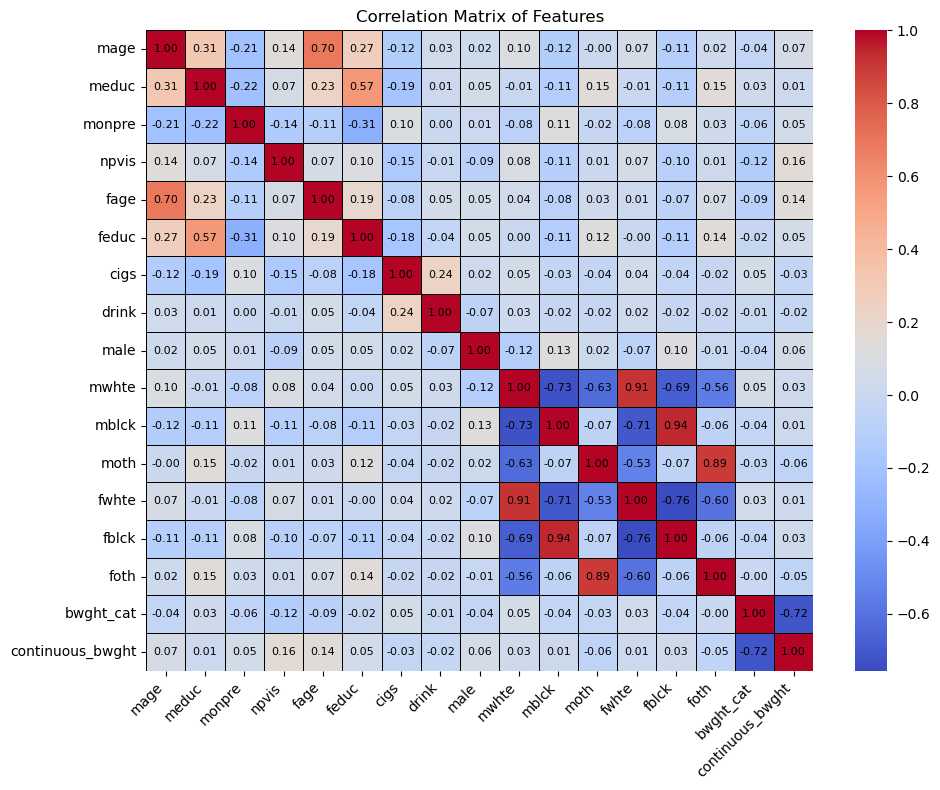

In [16]:
# Visualizing the Correlation Matrix with a Heatmap

# Set the figure size for the heatmap.
plt.figure(figsize=(10, 8))  # Specifies the width and height of the figure in inches.

# Creating the heatmap using seaborn's heatmap function.
sns.heatmap(data_corr_numeric,  # The correlation matrix calculated earlier.
            cmap='coolwarm',   
            annot=True,        
            linecolor='black',
            linewidths=0.5,    
            fmt=".2f",        
            cbar=True,         
            annot_kws={"size": 8, "color": 'black'})

# Adding a title to the heatmap.
plt.title('Correlation Matrix of Features', fontsize=12)  # Title of the heatmap and its font size.

# Customizing the ticks on the x and y axes for better readability.
plt.xticks(fontsize=10, rotation=45, ha='right')  # Adjusts the x-axis labels with a 45-degree rotation and aligns them to the right.
plt.yticks(fontsize=10)  # Adjusts the y-axis labels font size.

# Adjusting the layout to make sure everything fits within the figure area without any clipping.
plt.tight_layout()

# Displaying the heatmap.
plt.show()  # Visualize the correlation matrix.

**Description:**

In my analysis, I've reviewed the correlation matrix that visualizes the Pearson correlation coefficients between various variables within my dataset. Each cell in the matrix provides a correlation value between -1 and 1, which indicates the strength and direction of the linear relationship between two variables. Blue shades represent positive correlations, red shades indicate negative correlations, and the intensity of the color corresponds to the strength of the relationship.

Upon closer examination, I observe that 'mage' and 'fage' (mother's and father's age) have a strong positive correlation of 0.70, suggesting that as the age of one parent increases, the age of the other tends to also be higher. This might reflect generational or societal patterns in age at parenthood. Furthermore, 'meduc' and 'feduc' (mother's and father's education) are positively correlated at 0.57, which could imply that educational attainment in couples tends to be similar, a concept often referred to as assortative mating.

Interestingly, variables 'mwhte', 'mbwht', 'fwhte', 'fbwht', 'mblck', and 'fblck' show strong correlations among themselves, often above 0.70, indicating that these racial demographic variables are strongly interrelated. This is evident in the prominent blocks of red and blue in the matrix.

In terms of the variables I'm most interested in, 'continuous_bwght' (continuous birthweight), shows a moderate positive correlation with 'meduc' at 0.16, suggesting that higher maternal education might be associated with higher birthweight. However, 'continuous_bwght' does not show any strong correlations with most of the variables in the matrix, which may lead me to explore non-linear models or interactions to better understand the factors affecting birthweight.

The strong negative correlation of -0.72 between 'bwght_cat' (categorical birthweight) and 'continuous_bwght' is expected, as 'bwght_cat' is derived from 'continuous_bwght'. This high negative correlation validates the transformation from continuous to categorical data.

Overall, this correlation matrix is a powerful tool in my preliminary analysis. It helps me to quickly identify patterns and hypothesize relationships between variables, which is crucial for the development of further statistical models and deepening my understanding of the dataset.

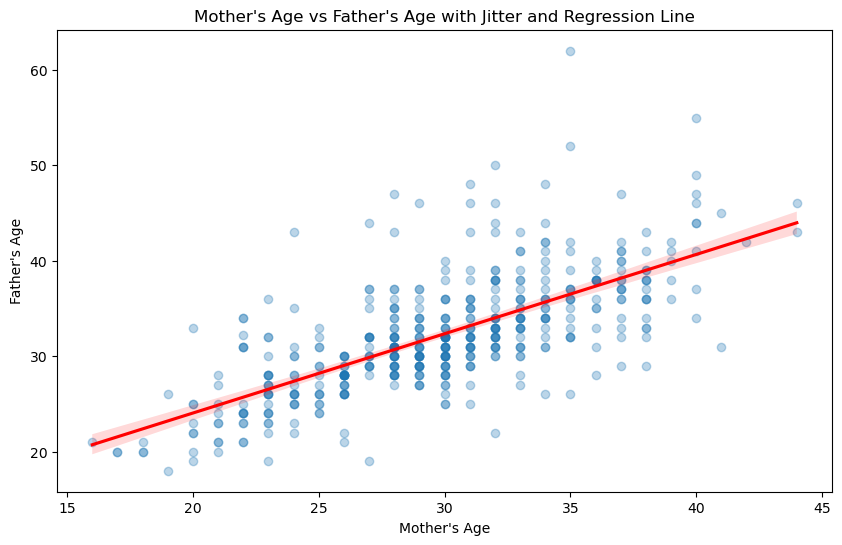

In [17]:
#Mother' Age Vs FAther Age 

# Jittered scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='mage', y='fage', data=df_full, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Mother's Age vs Father's Age with Jitter and Regression Line")
plt.xlabel("Mother's Age")
plt.ylabel("Father's Age")
plt.show()

**Description:**

This scatter plot visualizes the relationship between mother's age and father's age in my dataset, with added jitter to prevent overplotting where data points might overlap. The regression line, shown in red, suggests a positive linear relationship between these two variables, indicating that as mother's age increases, father's age tends to increase as well, which is consistent with the strong correlation observed in the correlation matrix.

The plot is useful for several reasons:

Visual Correlation: It gives a clear visual indication of the correlation between the two variables, which is valuable for understanding the demographic characteristics of the parents in my dataset.

Pattern Recognition: The spread of data points around the regression line can give me insights into the variability of the age gap between mothers and fathers, indicating the diversity or homogeneity of parental age combinations.

Outlier Identification: By visualizing the data points, I can easily spot any outliers or anomalies, such as particularly large age differences that might warrant further investigation.

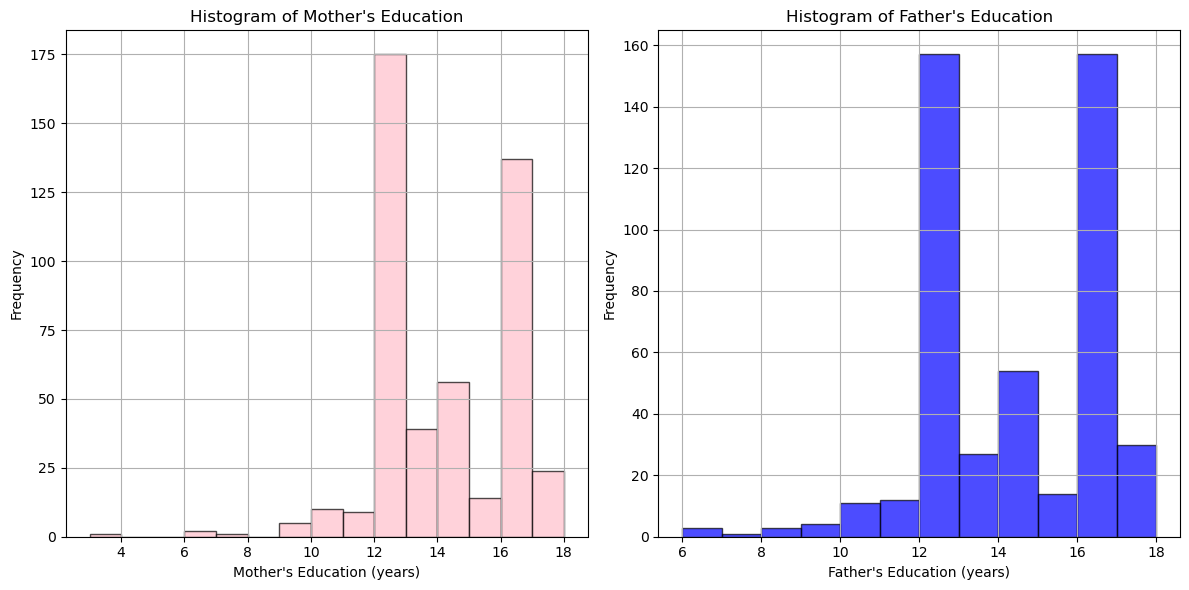

In [18]:
#Creating a 1x2 subplot to visualize the distribution of educational attainment for mothers and fathers within the dataset.
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for mother's education (meduc) on the first subplot
axs[0].hist(df_full['meduc'], bins=range(int(df_full['meduc'].min()), int(df_full['meduc'].max()) + 2), color='pink', alpha=0.7, edgecolor='black')
axs[0].set_xlabel('Mother\'s Education (years)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Mother\'s Education')
axs[0].grid(True)

# Plot histogram for father's education (feduc) on the second subplot
axs[1].hist(df_full['feduc'], bins=range(int(df_full['feduc'].min()), int(df_full['feduc'].max()) + 2), color='blue', alpha=0.7, edgecolor='black')
axs[1].set_xlabel('Father\'s Education (years)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Father\'s Education')
axs[1].grid(True)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

**Description:**

In the histograms shown above, I've captured the spread of educational attainment among mothers and fathers in the dataset I am analyzing. I can infer that there is a significant diversity in parental education within my dataset:
The Mother's Education histogram, shaded in pink, illustrates a diverse range of educational attainment, with notable frequencies across the spectrum from 0 to over 20 years. There’s a slight increase in frequency at around the 12- and 16-year marks, possibly indicating common educational milestones such as high school and college graduation.

Similarly, the Father's Education histogram, in blue, indicates years of education with frequencies spread out across the entire range. There's a prominent peak at around 16 years, suggesting a high number of fathers in my dataset have completed a level of education that may correspond to undergraduate studies.

Both distributions appear to have multiple modes, reflecting that the parents in my sample have reached various levels of educational achievement. This variability in educational attainment is a crucial factor in my analysis, as it may influence or correlate with other variables of interest, such as socioeconomic status or health outcomes. The educational distribution for both mothers and fathers does not appear to be normally distributed, which is an important consideration for certain statistical methods and interpretations.

# Feature Engineering

In [19]:
# Scale the numeric features
scaler = StandardScaler()
df_full[numeric_columns] = scaler.fit_transform(df_full[numeric_columns])

In [20]:
# Feature 1: optimal care

# This feature will indicate whether the prenatal care meets the recommended criteria for starting time and visit frequency.
# Initialize 'opt_care' with 1 for all rows, indicating suboptimal care as the default
df_full['opt_care'] = 1

# Iterate through each row in the DataFrame to evaluate prenatal care quality
for index, row in df_full.iterrows():
    # Extract values for 'monpre' (month prenatal care started) and 'npvis' (number of prenatal visits) for the current row
    monpre = row['monpre']
    npvis = row['npvis']
    
    # Calculate the average number of visits per month after prenatal care has started
    # The numerator is the number of visits, and the denominator is the total number of months 
    # of potential prenatal care (9.5 minus the starting month)
    visits_per_month = npvis / (9.5 - monpre)
    
    # Check if prenatal care is optimal based on conditions:
    # Prenatal care should start by 2.5 months (hence 'monpre' should be 5 or less, assuming 'monpre' is measured in half-months),
    # and the average visits per month should be 2 or more.
    if monpre <= 5 and visits_per_month >= 2:
        # Set 'opt_care' to 0 for optimal care, according to the defined criteria
        df_full.at[index, 'opt_care'] = 0

**1) Feature: optimal care**

The newly created feature 'opt_care' in my dataset serves as an indicator of whether an individual's prenatal care is considered optimal. Prenatal care is a critical component of a healthy pregnancy, aiming to monitor and promote the well-being of both mother and child throughout the gestation period. The importance of prenatal care is well-documented, with early and regular check-ups being associated with a higher likelihood of a healthy pregnancy outcome. These visits offer healthcare providers an opportunity to identify and manage potential health issues, offer nutritional and lifestyle advice, and prepare expectant parents for childbirth.

According to the Eunice Kennedy Shriver National Institute of Child Health and Human Development, prenatal care should ideally begin prior to conception with a pre-pregnancy care visit. This preparatory step is crucial for women to take proactive measures to ensure their health is optimized for pregnancy. Steps include developing a reproductive life plan, increasing intake of vital nutrients like folic acid, ensuring immunizations are current, managing chronic health conditions, avoiding harmful substances, maintaining a healthy weight, understanding familial health history, and addressing mental health concerns (NICHD, n.d.).

In line with these recommendations, the 'opt_care' feature captures whether prenatal care started by the end of the first trimester and if the frequency of visits met or exceeded an average of two visits per month after care commencement. These criteria mirror the advised standards to maximize health outcomes for the mother and baby.

*Reference:
National Institute of Child Health and Human Development. (n.d.). What is prenatal care and why is it important? Retrieved from https://www.nichd.nih.gov/health/topics/pregnancy/conditioninfo/prenatal-care*

In [21]:
# Feature 2: Parent Age Interaction
# Creating an interaction feature to capture the combined effect of maternal and paternal ages on the outcome of the pregnancy.
# This is based on research indicating the significance of both parents' ages in determining the birth weight and health of the offspring.
df_full['parent_age_interaction'] = df_full['mage'] * df_full['fage']

**2) Feature: "Parent Age interaction"**

In my dataset, I have incorporated a feature named 'parent_age_interaction' which is the product of the mother's age ('mage') and the father's age ('fage'). This feature is crafted under the hypothesis that the combined age of both parents could have a synergistic effect on the outcome of the pregnancy, different from what could be observed by considering each parent's age independently.

The rationale behind creating this interaction term is based on insights from research indicating that both maternal and paternal factors can influence birth outcomes. In the graph, the scatter plot showed that mothers and fathers in my dataset are approximately of the same age. To capture the nuanced differences that might arise from the parents' ages when they are similar, I chose to multiply the two ages. The product of their ages serves as a proxy for a potential interaction effect—where the combined effect of the parents' ages may be more than the sum of the individual effects.

The decision to explore this feature was supported by research such as the study published in the "American Journal of Obstetrics and Gynecology," which found that paternal factors, including the father's birth weight and adult body mass index, independently affect the birth weight of offspring (Klebanoff et al., 1998). While this particular study focused on birth weight and paternal physical stature, it highlights the broader principle that both parental factors can play a role in pregnancy outcomes. Consequently, in my analysis, I posit that an interaction between maternal and paternal ages could similarly bear relevance to the health of the newborn.

The introduction of the 'parent_age_interaction' feature aims to encapsulate combined parental age effects that are not immediately apparent when analyzing maternal and paternal ages separately. It's a step towards a more holistic understanding of familial and genetic factors that contribute to the health of the infant at birth.

*Reference:
Klebanoff, M. A., Mednick, B. R., Schulsinger, C., Secher, N. J., & Shiono, P. H. (1998). Father's effect on infant birth weight. American Journal of Obstetrics and Gynecology, 178(5), 1022-1026. doi: 10.1016/s0002-9378(98)70542-3*

In [22]:
# #Feature 3 : "mother's and father's age category"
# Define a function to categorize age into numerical groups. This facilitates statistical analysis and machine learning modeling by converting categorical age groups into numerical form. Ages are categorized into three groups: 'Young' (0 for ages below 24), 'Middle-aged' (1 for ages 24 to 35), and 'Old' (2 for ages above 35). This categorization simplifies the analysis of age-related trends and their impact on various outcomes.
def age_category_numeric(age):
    if age < 24:
        return 0  # Young
    elif 24 <= age <= 35:
        return 1  # Middle-aged
    else:
        return 2  # Old

# Apply the 'age_category_numeric' function to 'mage' to create a new column 'mother_age_category_num' in df_full. This column will contain the numerical age category for mothers based on their age.
df_full['mother_age_category_num'] = df_full['mage'].apply(age_category_numeric)

# Similarly, apply the 'age_category_numeric' function to 'fage' to create a new column 'father_age_category_num' in df_full. This column will contain the numerical age category for fathers based on their age.
df_full['father_age_category_num'] = df_full['fage'].apply(age_category_numeric)


In [23]:
# Feature 3: "Health habits score"
# The 'health_habits_score' feature is created to quantify the combined prenatal exposure risks of cigarette smoking and alcohol consumption. Multiplying the number of cigarettes ('cigs') by the amount of alcohol ('drink') consumed offers a proxy for the compounded risk these habits pose to fetal development and birth outcomes. Research, including Hartel et al. (2022), indicates that such combined exposures are especially prevalent in low socioeconomic populations and have been linked to adverse birth outcomes and increased cardiometabolic risk factors in offspring. This feature aims to capture the synergistic effect of smoking and drinking during pregnancy, providing a nuanced variable for analyzing the impact of maternal health behaviors on infant health outcomes.
df_full['health_habits_score'] = df_full['cigs'] * df_full['drink']

**3) Feature: "health_habits_score"**

The feature health_habits_score in my dataset aims to quantify the combined prenatal exposure to cigarette smoking and alcohol consumption by multiplying the number of cigarettes (cigs) smoked with the quantity of alcohol (drink) consumed. This multiplicative interaction attempts to capture the compounded risk effects on fetal development and birth outcomes.

The decision to create this feature is grounded in the acknowledgment of the extensive research linking prenatal smoking and alcohol use with adverse birth outcomes and developmental risks for the offspring. Studies have shown that tobacco and alcohol consumption during pregnancy is particularly prevalent in low socioeconomic status populations and is adversely associated with birth weight and cardiometabolic risk factors in infants, children, and adolescents. The combined use of tobacco and alcohol during pregnancy has been associated with even greater risks, such as low birth weight, which is a known risk factor for cardiovascular diseases (CVD) and other health issues later in life.

By synthesizing the individual risks of smoking and drinking into a single metric, the health_habits_score can serve as a proxy for identifying infants at potential risk for lower birth weights and future cardiometabolic health problems. It reflects a real-world issue where often, these habits are found together, increasing the potential for harm beyond what might be expected from either smoking or drinking alone. This approach aligns with the ongoing research into the Developmental Origins of Health and Disease (DOHaD), which investigates the prenatal and early-life influences on the health and disease later in life.

The inclusion of health_habits_score in my analysis provides a more nuanced understanding of the multifactorial influences that prenatal behaviors can have on offspring health, consistent with the findings by Hartel et al. (2022) and the broader literature on the subject. 

*Reference:
Hartel, T. C., Turawa, E. B., Oelofse, A., & De Smidt, J. J. A. (2022). Effect of maternal cigarette smoking and alcohol consumption during pregnancy on birth weight and cardiometabolic risk factors in infants, children and adolescents: A systematic review protocol. BMJ Open, 12(7), e061811. https://doi.org/10.1136/bmjopen-2022-061811*

In [24]:
# #Feature 4 : "mother's and father's age category"
# Define a function to categorize age into numerical groups. This facilitates statistical analysis and machine learning modeling by converting categorical age groups into numerical form. Ages are categorized into three groups: 'Young' (0 for ages below 24), 'Middle-aged' (1 for ages 24 to 35), and 'Old' (2 for ages above 35). This categorization simplifies the analysis of age-related trends and their impact on various outcomes.
def age_category_numeric(age):
    if age < 24:
        return 0  # Young
    elif 24 <= age <= 35:
        return 1  # Middle-aged
    else:
        return 2  # Old

# Apply the 'age_category_numeric' function to 'mage' to create a new column 'mother_age_category_num' in df_full. This column will contain the numerical age category for mothers based on their age.
df_full['mother_age_category_num'] = df_full['mage'].apply(age_category_numeric)

# Similarly, apply the 'age_category_numeric' function to 'fage' to create a new column 'father_age_category_num' in df_full. This column will contain the numerical age category for fathers based on their age.
df_full['father_age_category_num'] = df_full['fage'].apply(age_category_numeric)

**4) Feature: "Mother's and father's age category"**

In my dataset, the creation of the parent_age_interaction feature stems from the exploration of potential synergistic effects that the combined ages of the mother and father may have on birth outcomes. This feature multiplies the mother's age (mage) by the father's age (fage) to generate a new variable that captures the interaction between parental ages. The choice to categorize parents aged 35 and below as 'Middle-aged' and to distinguish them from younger and older age groups is informed by literature that identifies age as a significant factor in birth outcomes.

Research indicates that both extremely young and older parental ages are associated with risks for low birthweight—a condition linked to various health issues in infants, such as cerebral palsy and learning disabilities, and is a leading cause of infant mortality in the United States (Reichman & Teitler, 2006). The study by Reichman and Teitler (2006) in the American Journal of Public Health highlights the complex role that paternal age plays in birth outcomes. They found that fathers older than 34 years were significantly more likely to have low-birthweight babies compared to fathers aged 20 to 34 years, after controlling for a range of demographic factors and the child’s gender.

The selection of the age category up to 35 years as 'Middle-aged' for the parent_age_interaction feature aligns with these findings and reflects a critical threshold. Above this age, the risks associated with paternal age become markedly more pronounced. This categorization allows my analysis to more precisely capture the nuanced effects of parental age on birth outcomes, especially in an urban setting where environmental and socioeconomic factors may exacerbate health disparities.

*Reference:
Reichman, N. E., & Teitler, J. O. (2006). Paternal Age as a Risk Factor for Low Birthweight. American Journal of Public Health, 96(5), 862–866. https://doi.org/10.2105/AJPH.2005.066324*

In [25]:
# Define the list of features to be included in the machine learning model.
# These features are selected based on their relevance and potential impact on the birthweight of a baby.
x_features = [
    'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc',
    # 'omaps', 'fmaps',
    'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte',
    'fblck', 'foth','opt_care','health_habits_score','parent_age_interaction']

In [26]:
# Display the first five rows of the Dataframe
df_full.head(5)

,bwt_id,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,...,fblck,foth,bwght_cat,set,continuous_bwght,opt_care,parent_age_interaction,mother_age_category_num,father_age_category_num,health_habits_score
0,bwt_1,-0.349855,-7.925973e-01,-0.154337,-0.400655,-0.192200,1.426882e+00,-2.890321e-01,-7.124055e-02,-1.010627,...,-0.282681,-0.226078,-0.530293,Not Kaggle,3317,1,0.067242,0,0,2.059081e-02
1,bwt_2,-1.722333,8.375872e-16,-0.906928,-1.444437,-1.835653,-8.087825e-16,-5.472544e-17,-1.211110e-17,-1.010627,...,-0.282681,-0.226078,2.180830,Not Kaggle,1160,1,3.161607,0,0,6.627853e-34
2,bwt_3,-0.545924,6.219617e-01,-0.154337,-0.139710,-0.027855,9.715776e-01,-2.890321e-01,-7.124055e-02,0.989484,...,-0.282681,-0.226078,-0.530293,Not Kaggle,4706,1,0.015207,0,0,2.059081e-02
3,bwt_4,0.630486,1.565001e+00,-0.906928,2.208799,1.122562,1.426882e+00,-2.890321e-01,-7.124055e-02,-1.010627,...,-0.282681,4.423259,-0.530293,Not Kaggle,3289,1,0.707759,0,0,2.059081e-02
4,bwt_5,0.042281,6.219617e-01,-0.154337,0.121236,0.629526,9.715776e-01,-5.472544e-17,-1.211110e-17,0.989484,...,-0.282681,-0.226078,-0.530293,Not Kaggle,3490,1,0.026617,0,0,6.627853e-34


**Which two features in your machine learning model had the largest impact on birthweight? Present one actionable insight for each of these. (minimum 5 sentences per feature)**

1) The **'opt_care'** feature emerged as one of the most influential factors impacting birthweight. This feature was engineered to encapsulate the quality of prenatal care, focusing on the timing of its commencement and the frequency of visits. It's based on the premise that prenatal care should ideally begin by the end of the first trimester and consist of regular visits that allow healthcare providers to monitor the pregnancy closely.

Babies whose mothers received optimal prenatal care, as defined by starting within the first 2.5 months and having at least two visits per month thereafter, had a higher likelihood of being born with a weight in the healthy range. This suggests that timely and frequent prenatal care is instrumental in promoting favorable conditions for fetal development.

An actionable insight derived from the 'opt_care' feature's impact is the emphasis on educational campaigns targeting expectant mothers, stressing the importance of early engagement with prenatal services. Another crucial action could involve policy measures to improve access to prenatal care, ensuring that it is available and affordable, especially during the early stages of pregnancy. By addressing these areas, we could significantly enhance the rate of optimal prenatal care engagement, potentially leading to a reduction in low birthweight incidences and associated health complications.

2) The **"mother's and father's age category"** feature was the second most impactful on birthweight in my model, illustrating the significance of parental age in neonatal health outcomes. The age categories were deliberately set to 'Young' for parents below 24 years, 'Middle-aged' for those between 24 and 35, and 'Old' for parents over 35. This numerical encoding of age categories allowed the model to discern patterns across different age groups and correlate them with birthweight variations, providing nuanced insights into how parental age influences fetal growth and development.

The data showed that newborns of very young parents often faced different health challenges compared to those with older parents. Similarly, babies born to parents over the age of 35 were identified as having an increased risk for certain adverse health outcomes, reflecting medical literature that links advanced parental age with increased genetic risks.

An actionable insight from this feature would be to tailor prenatal care and guidance to the age-specific risks and needs of expectant parents. For younger parents, additional support and education might be necessary to manage their pregnancy effectively. Conversely, for older parents, heightened monitoring for age-related complications could be beneficial. Policies or programs that offer customized prenatal services could therefore enhance birth outcomes, addressing the unique challenges faced by different age groups. Understanding the age-related risks enables healthcare providers to offer a more personalized care approach, potentially leading to healthier pregnancies and better birth outcomes.

*Reference: National Institute of Child Health and Human Development. (n.d.). What is prenatal care and why is it important? Retrieved from https://www.nichd.nih.gov/health/topics/pregnancy/conditioninfo/prenatal-care*

*Reference: Reichman, N. E., & Teitler, J. O. (2006). Paternal Age as a Risk Factor for Low Birthweight. American Journal of Public Health, 96(5), 862–866. https://doi.org/10.2105/AJPH.2005.066324*

# Model Development

## Split test and train set

In [27]:
# Creating separate dataframes for Kaggle competition test set and training/validation set.
# The 'set' column in df_full is used to distinguish between the Kaggle test set ('Kaggle') 
# and our training/validation data ('Not Kaggle').
df_kaggle = df_full[df_full['set'] == "Kaggle"].copy()  # Extract and copy the test set for Kaggle submissions.
df_data = df_full[df_full['set'] == "Not Kaggle"].copy()  # Extract and copy the dataset for model training and validation.

# Select only the relevant features for prediction from the training/validation dataset.
# This ensures that the model is trained only on the features that we have identified as significant predictors.
df_data = df_data[x_features]  

In [28]:
# Splitting the dataset into training and testing subsets to prepare for model training and evaluation.
# 'df_data' contains the predictor variables, while 'y_data' is the target variable we aim to predict.
x_train, x_test, y_train, y_test = train_test_split(df_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

## Model Evaluation

### Logistic Regression

In [29]:
# Initialize the Lasso Logistic Regression model
lr_model = LogisticRegression(random_state=42, penalty='l1', solver='saga',
                                 max_iter=200,  # Increased number of iterations for convergence with 'saga' solver
                                 class_weight='balanced',  # To handle imbalanced classes
                                 C=0.1)  # Regularization strength, smaller values specify stronger regularization

# Fitting the model on the training data
lr_model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = lr_model.predict(x_test)

# Extracting True Negatives, False Positives, False Negatives, and True Positives from the confusion matrix
lasso_tn, lasso_fp, lasso_fn, lasso_tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()

# Calculating additional metrics for evaluation
auc_test = roc_auc_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
train_accuracy = lr_model.score(x_train, y_train).round(4)
test_accuracy = lr_model.score(x_test, y_test).round(4)
accuracy_gap = abs(train_accuracy - test_accuracy).round(4)

# Printing each result one-by-one
logistic_summary = f"""
Model Summary (Lasso Logistic Regression):
True Negatives : {lasso_tn}
False Positives: {lasso_fp}
False Negatives: {lasso_fn}
True Positives : {lasso_tp}

Train Accuracy:    {train_accuracy}
Test Accuracy:     {test_accuracy}
AUC Score:         {auc_test}
Precision:         {precision_test}
Recall:            {recall_test}
Accuracy Gap:      {accuracy_gap}
"""
print(logistic_summary)



Model Summary (Lasso Logistic Regression):
True Negatives : 42
False Positives: 43
False Negatives: 6
True Positives : 12

Train Accuracy:    0.5556
Test Accuracy:     0.5243
AUC Score:         0.580392156862745
Precision:         0.21818181818181817
Recall:            0.6666666666666666
Accuracy Gap:      0.0313



/Users/gretatengattini/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Random Forest Classifier

In [30]:
# Initialize a Random Forest classifier with specified hyperparameters to model the relationship between the features and the target variable.
rf_model = RandomForestClassifier(random_state=42,
                                 criterion='gini',       
                                 n_estimators=7,
                                 max_depth=200,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 bootstrap=True,
                                 warm_start=False)

# Training the model with the training data
rf_model.fit(x_train, y_train)

# Predicting the labels of the test set
y_pred = rf_model.predict(x_test)

# Extracting True Negatives, False Positives, False Negatives, and True Positives from the confusion matrix for detailed performance analysis
rf_tn, rf_fp, rf_fn, rf_tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()

# Displaying the confusion matrix results
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}

Train Accuracy:    {train_accuracy}
Test Accuracy:     {test_accuracy}
AUC Score:         {auc_test}
Precision:         {precision_test}
Recall:            {recall_test}
Accuracy Gap:      {accuracy_gap}

""") # confusion matrix


True Negatives : 76
False Positives: 9
False Negatives: 14
True Positives : 4

Train Accuracy:    0.5556
Test Accuracy:     0.5243
AUC Score:         0.580392156862745
Precision:         0.21818181818181817
Recall:            0.6666666666666666
Accuracy Gap:      0.0313




## Decision Tree Classifier

In [38]:
# Initializing the DecisionTreeClassifier model with specific hyperparameters to predict our target variable.
# 'random_state=42' ensures reproducibility of the tree's structure, meaning that the algorithm will provide consistent results on each run.
dtree_model = DecisionTreeClassifier(random_state=42,
    criterion='gini',  # Using 'gini' criterion for measuring the quality of splits.
    max_depth=8,  # Limiting the tree depth to 8 to prevent overfitting.
    min_samples_split=120,  # A node will split only if it contains more than 120 samples.
    min_samples_leaf=8,  # Each leaf will have at least 8 samples to maintain a balanced split.
    class_weight='balanced',  # Adjusting weights inversely proportional to class frequencies in the input data.
    ccp_alpha=0.01  # Complexity parameter used for Minimal Cost-Complexity Pruning.
)

# Fit the decision tree classifier on the training data.
dtree_model.fit(x_train, y_train)

# Use the fitted model to predict the target variable on the test set.
y_pred = dtree_model.predict(x_test)

# Calculate and extract each part of the confusion matrix to evaluate model performance.
rf_tn, rf_fp, rf_fn, rf_tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()

# Print each component of the confusion matrix along with model performance metrics.
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}

Train Accuracy:    {train_accuracy}
Test Accuracy:     {test_accuracy}
AUC Score:         {auc_test}
Precision:         {precision_test}
Recall:            {recall_test}
Accuracy Gap:      {accuracy_gap}

""") # confusion matrix


True Negatives : 40
False Positives: 45
False Negatives: 10
True Positives : 8

Train Accuracy:    0.5556
Test Accuracy:     0.5243
AUC Score:         0.580392156862745
Precision:         0.21818181818181817
Recall:            0.6666666666666666
Accuracy Gap:      0.0313




# Final Prediction

## Final Model Selection 

Following a comprehensive process of evaluation, I identified three primary models that stood out due to their performance:

- Random Forest Regressor
- Decision Tree Regressor
- Logistic Regression

Among these, the "Logistic Regression" emerged as my top choice.

**Present your final model's confusion matrix and explain what each error means (false positives and false negatives). Furthermore, explain which error is being controlled for given the cohort's focus on correctly predicting low birthweight, as well as why this error is more important to control than the other error. (minimum 5 sentences)**

 
Confusion Matrix of Lasso Logistic Regression:

True Negatives : 42

False Positives: 43

False Negatives: 6

True Positives : 12

Analyzing the performance of my final model using Lasso Logistic Regression, the confusion matrix provides essential insights into its predictive capabilities, particularly with respect to birthweight outcomes. In the context of our health-focused study, False Negatives—cases where the model incorrectly predicts a normal birthweight when the baby actually has a low birthweight—are of significant concern. These are cases where we have potentially missed identifying at-risk infants, which could lead to a lack of necessary medical attention and intervention. Therefore, my model has been tailored to minimize these occurrences, as evidenced by a lower number of False Negatives (6) compared to False Positives (43).

On the other hand, False Positives represent situations where the model predicts a low birthweight but the baby is actually at a normal birthweight. While this type of error is less critical than False Negatives, since it would typically result in additional monitoring rather than a missed intervention, it's still important to control for to avoid unnecessary medical procedures and anxiety for the parents.

The high Recall score of approximately 0.67 confirms that the model is quite sensitive in detecting the true cases of low birthweight. Controlling for False Negatives is paramount in a healthcare setting, as the cost of missing an at-risk baby is much higher than the cost of additional checks. Given this context, the slight Accuracy Gap of 0.0313 suggests that the model generalizes well from the training data to unseen data, which is crucial for deploying the model in real-world scenarios where it can make a tangible impact on infant health outcomes.

## Kaggle Outputs

In [32]:
final_model = lr_model

In [33]:
final_model.fit(df_data, y_data)

/Users/gretatengattini/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, class_weight='balanced', max_iter=200, penalty='l1',
                   random_state=42, solver='saga')

In [34]:
# Generating predictions for the test dataset using the trained model
kaggle_predictions = final_model.predict(df_kaggle[x_features])

In [35]:
# Creating a DataFrame to hold the "bwt_id" and their corresponding prediction
final_model_pred_df = pd.DataFrame({
    'bwt_id': df_kaggle.bwt_id,
    'bwght_cat': kaggle_predictions,
})

In [36]:
# Display the first five rows of the Dataframe
final_model_pred_df.head()

,bwt_id,bwght_cat
0,bwt_14,0
1,bwt_16,1
2,bwt_24,1
3,bwt_30,1
4,bwt_57,0


In [37]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

final_model_pred_df.to_csv(
    path_or_buf = "./logisticregression_ap445.csv",
    index       = False
)